<hr style="border:2px solid gray"> </hr>
<center>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=120 />
</center>

<center>
<div class="alert alert-block alert-info">
    <h1 style="text-align: center"></h1>
</div>
</center>

# <center>CSCI 5270 - Machine Learning</center>


### <center>Supervised Learning - Convolutional Neural Networks (CNNs)</center>

<center>Dr. Ahmad Al-Doulat </center>
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

### General steps for building and training a Convolutional Neural Network (CNN) for image classification:

1. **Data Preprocessing**:
   - Collect and preprocess your image dataset. This may involve tasks like resizing images to a fixed size, normalizing pixel values, and splitting the data into training, validation, and testing sets.

2. **Designing the Architecture**:
   - Define the architecture of your CNN. This typically involves stacking convolutional layers, pooling layers, and fully connected layers.
   - Convolutional layers: These layers apply convolution operations to the input image, extracting features through learned filters.
   - Pooling layers: These layers downsample the feature maps, reducing spatial dimensions and controlling overfitting.
   - Fully connected layers: These layers take the flattened output of the convolutional layers and perform classification.

3. **Model Compilation**:
   - Compile your CNN model. This involves specifying the loss function, optimizer, and evaluation metrics.
   - Loss function: Choose an appropriate loss function based on your classification task (e.g., categorical cross-entropy for multi-class classification).
   - Optimizer: Select an optimizer algorithm (e.g., Adam, SGD) to minimize the loss function during training.
   - Metrics: Choose evaluation metrics to monitor during training (e.g., accuracy).

4. **Training the Model**:
   - Train your CNN model on the training data. This involves feeding batches of images through the network and updating the model's parameters based on the computed loss.
   - Monitor the training process by evaluating the model's performance on the validation set at regular intervals to detect overfitting.
   - Adjust hyperparameters such as learning rate, batch size, and model architecture if necessary.

5. **Evaluation**:
   - Evaluate the trained model on the test dataset to assess its performance on unseen data.
   - Compute evaluation metrics such as accuracy, precision, recall, and F1-score to measure the model's performance.

6. **Fine-tuning (Optional)**:
   - Fine-tune your CNN model by adjusting hyperparameters or retraining on additional data to further improve performance.

These steps provide a general framework for building and training CNNs for image classification tasks, but specific implementations may vary depending on the dataset and problem at hand.

In [5]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [2]:
# Step 2: Load and preprocess the MNIST dataset
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to fit the model
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize the pixel values to be between 0 and 1
X_train /= 255
X_test /= 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [43]:
# Step 3: Define the CNN architecture
model = Sequential()

# Add a convolutional layer with 32 filters, each with a 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layer
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add an output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

In [44]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Step 5: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 [==============================] - 40s 42ms/step - loss: 0.1865 - accuracy: 0.9447 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 2/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.0511 - val_accuracy: 0.9834
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0431 - val_accuracy: 0.9846
Epoch 4/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0436 - val_accuracy: 0.9858
Epoch 5/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0466 - val_accuracy: 0.9853


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

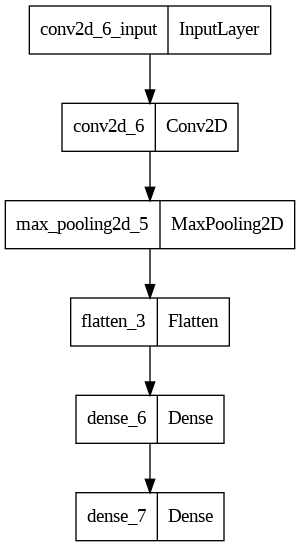

In [47]:
plot_model(model)

In [48]:
# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.0466 - accuracy: 0.9853
Test Accuracy: 0.9853000044822693


In [52]:
predictions = model.predict(X_test[:20])
print('Predictions:', np.argmax(predictions, axis=1))
print('True Labels:', np.argmax(y_test[:20], axis=1))

1/1 [==============================] - 0s 46ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


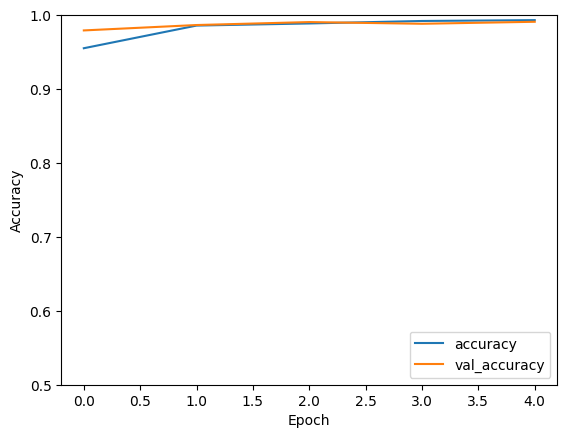

In [53]:
# Step 7: Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

### Experimenting with a different model architecture

In [9]:
# Step 2: Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
# Step 3: Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Step 5: Train the model
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5, validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))

Epoch 1/5
1875/1875 [==============================] - 70s 36ms/step - loss: 0.1430 - accuracy: 0.9560 - val_loss: 0.0429 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0334 - val_accuracy: 0.9882
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0254 - val_accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0281 - val_accuracy: 0.9910


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

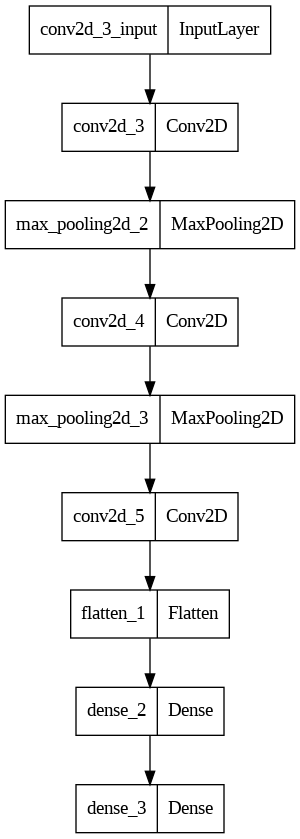

In [14]:
plot_model(model)

In [15]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0281 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


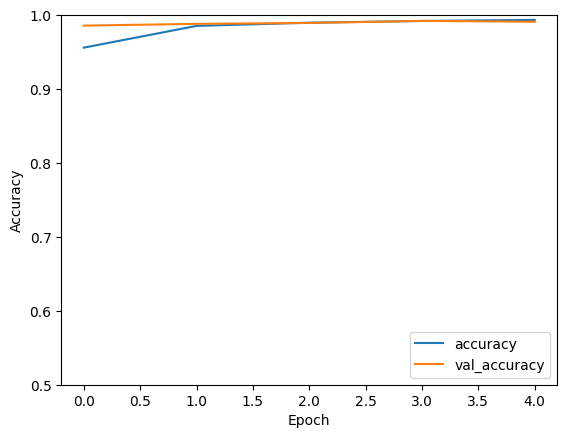

In [16]:
# Step 7: Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()